In [1]:
import pandas as pd
df = pd.ExcelFile('Campus+Challenge+-+Data+and+Metadata.xlsx')
df

In [2]:
df.sheet_names

['Data', 'Metadata', 'Sheet1']

In [3]:
dataframe = df.parse('Data')
dataframe

cust_num  month  cust_demographics_ai  cust_demographics_aii  \
0           9246      9                     4                      1   
1           1273      2                     3                      3   
2           6682      8                     3                      3   
3           7946      5                     4                      4   
4           3681      4                     1                      1   
5           7349     10                     1                      1   
6           6659      3                     3                      3   
7           7416     12                     5                      5   
8           6926      7                     2                      3   
9            360      8                     3                      3   
10          4295      8                     0                      1   
11          2522      3                     5                      3   
12          5456      4                     2                      4   
13          1502      5                     3                      4   
14          3174      5                     3                      3   
15          4194      1                     2                      1   
16          8167      7                     1                      3   
17           558      2                     2                      4   
18          3376      7                     4                      1   
19           890      1                     1                      1   
20          5744      8                     1                      3   
21          2697      6                     5                      1   
22          1319      9                     2                      5   
23          5845      3                     2                      4   
24           972      3                     2                      1   
25          2030      4                     3                      4   
26          2949      1                     5                      5   
27          1418      4                     4                      1   
28          1532      4                     4                      3   
29          5313      4                     2                      3   
...          ...    ...                   ...                    ...   
119970      5405      9                     2                      3   
119971       818      3                     2                      5   
119972      5405     10                     2                      3   
119973       818     10                     2                      5   
119974      5405     12                     2                      3   
119975       818      1                     2                      5   
119976      9790      1                     5                      5   
119977      9790      2                     5                      5   
119978      9790      3                     5                      5   
119979      9790      4                     5                      5   
119980      9790      5                     5                      5   
119981      9790      6                     5                      5   
119982      9790      7                     5                      5   
119983      9790     11                     5                      5   
119984      9790      8                     5                      5   
119985      9790      9                     5                      5   
119986      9790     10                     5                      5   
119987      9790     12                     5                      5   
119988      6568      1                     5                      4   
119989      6568      2                     5                      4   
119990      6568      3                     5                      4   
119991      6568      4                     5                      4   
119992      6568      5                     5                      4   
119993      6568      6                     5   

In [4]:
dataframe.cust_num.nunique()

10000

Each cust_num has data for 12 months - month 1 to month 12. So, 10000 unique customers, and total rows = 12 x 10000 = 120000

## Questions
* What drives growth in accounts and/or balance between month 0 and month 12. 
* What demographic types, if any, are more likely to increase (or reduce) their number of accounts and/or balance between month 0 and month 12? 
* What types of accounts, customer interactions, customer events, or Wells Fargo outreach, are more correlated with account and/or balance change?

In [5]:
print('Min month:',dataframe.month.min(),' Max month:',dataframe.month.max())
print('Min balance:',dataframe.normal_tot_bal.min(),'Max balance:',dataframe.normal_tot_bal.max())

Min month: 1  Max month: 12
Min balance: -0.410621658033 Max balance: 55.4992889614


In [6]:
# Sort by cust_num,month. This will help us in looking for patterns
dataframe.sort_values(by=['cust_num','month'],ascending=True,inplace=True)
dataframe

cust_num  month  cust_demographics_ai  cust_demographics_aii  \
73075          1      1                     1                      1   
74423          1      2                     1                      1   
73749          1      3                     1                      1   
75097          1      4                     1                      1   
75771          1      5                     1                      1   
72401          1      6                     1                      1   
76445          1      7                     1                      1   
69031          1      8                     1                      1   
70379          1      9                     1                      1   
71053          1     10                     1                      1   
71727          1     11                     1                      1   
69705          1     12                     1                      1   
113918         2      1                     5                      5   
114093         2      2                     5                      5   
114268         2      3                     5                      5   
114443         2      4                     5                      5   
114618         2      5                     5                      5   
114793         2      6                     5                      5   
114968         2      7                     5                      5   
115318         2      8                     5                      5   
115493         2      9                     5                      5   
115668         2     10                     5                      5   
115143         2     11                     5                      5   
115843         2     12                     5                      5   
91868          3      1                     5                      4   
92397          3      2                     5                      4   
92926          3      3                     5                      4   
93455          3      4                     5                      4   
93984          3      5                     5                      4   
94513          3      6                     5                      4   
...          ...    ...                   ...                    ...   
73476       9998      7                     0                      1   
70780       9998      8                     0                      1   
74150       9998      9                     0                      1   
75498       9998     10                     0                      1   
74824       9998     11                     0                      1   
76172       9998     12                     0                      1   
24849       9999      1                     2                      2   
19089       9999      2                     2                      2   
18369       9999      3                     2                      2   
20529       9999      4                     2                      2   
23409       9999      5                     2                      2   
24129       9999      6                     2                      2   
25569       9999      7                     2                      2   
19809       9999      8                     2                      2   
17649       9999      9                     2                      2   
21249       9999     10                     2                      2   
21969       9999     11                     2                      2   
22689       9999     12                     2                      2   
94032      10000      1                     3                      3   
95090      10000      2                     3                      3   
95619      10000      3                     3                      3   
92445      10000      4                     3                      3   
93503      10000      5                     3                      3   
94561      10000      6                     3   

### Read balance subset data

In [10]:
balance_subset = pd.read_csv('balance_subset.csv')
balance_subset[['cust_num','change_1','change_2','change_3','change_4','change_5','change_6','change_7','change_8',
               'change_9','change_10','change_11']]

cust_num      change_1      change_2      change_3      change_4  \
0            1 -1.035313e-02 -6.719654e-03 -3.320567e-03 -3.320566e-03   
1            2 -1.005789e-02 -2.934347e-03  5.615314e-03  3.269984e-03   
2            3  1.110479e-02  2.692560e-04  3.264957e-02  1.150806e-02   
3            4  1.556550e-03  1.556550e-03  1.400770e-02  1.556628e-03   
4            5  6.299972e-03 -2.589007e-02 -2.430263e-02  1.116451e+00   
5            6  2.060635e-02 -1.789476e-01  3.768287e-02  6.348842e-03   
6            7 -4.678754e-03 -8.305930e-03  3.977910e-03 -2.773728e-03   
7            8  6.751108e-02 -4.799445e-02 -3.852441e-02  1.013741e-01   
8            9  2.066245e-02 -1.517475e-01 -1.167285e-01 -2.334482e-02   
9           10  1.073375e-02 -3.846239e-03  2.840808e-03  2.182142e-03   
10          11  1.062146e-02  3.764606e-03  7.485477e-03  1.533282e-03   
11          12 -1.121994e-01 -4.403187e-02 -1.922279e-02 -9.856650e-04   
12          13  8.560000e-07  9.340000e-07  8.560000e-07  9.340000e-07   
13          14 -4.135339e-02  1.630899e-02  3.183503e-02  2.472433e-02   
14          15 -6.364631e-01 -2.319487e+00  2.057924e-01 -4.717213e-02   
15          16 -7.048987e-03  3.157846e-03  1.177871e-02 -9.020080e-04   
16          17  8.966075e-03  1.459976e-03  1.191217e-02  1.398498e-03   
17          18 -5.803327e-03 -8.982262e-03  1.805262e-03 -7.154432e-03   
18          19  1.162160e-03  5.877022e-03  2.399103e-03  5.230652e-03   
19          20  1.393891e-02  1.737916e-02  5.093066e-03 -1.611412e-03   
20          21 -1.832755e-02  1.125265e-02  1.280889e-02 -2.065179e-03   
21          22  1.172276e-02  5.019916e-03 -3.439553e-03  1.702695e-03   
22          23  7.700000e-08  7.800000e-08  7.800000e-08  1.560000e-07   
23          24 -5.107307e-03 -7.192875e-03 -2.961118e-03 -6.183942e-03   
24          25 -2.104634e-02 -2.898294e-02  2.712974e-02 -1.329799e-02   
25          26  2.802000e-06  1.556690e-02  3.035000e-06  3.112000e-06   
26          27  3.020058e-02  3.045568e-02  1.351918e-01  2.723153e-02   
27          28 -5.613525e-03 -2.668951e-02 -5.656325e-03 -5.822750e-02   
28          29 -3.384566e-02 -1.199903e-01 -2.037040e-02  6.813193e-03   
29          30  4.969255e-03  4.969333e-03  4.969410e-03  4.969411e-03   
...        ...           ...           ...           ...           ...   
9970      9971  6.401682e-03  1.009143e-02  7.745395e-03  1.177303e-02   
9971      9972 -1.723146e-02 -1.579880e-02 -1.540986e-03 -1.138580e-02   
9972      9973  2.614174e-02  2.497507e-02 -9.562143e-02 -7.609444e-03   
9973      9974  3.214888e-03  2.934425e-03 -8.645770e-04 -9.562329e-03   
9974      9975  6.038731e-03  1.846335e-02 -6.941673e-03 -8.726390e-03   
9975      9976 -2.754195e-03  2.073140e-02 -2.224157e-02  2.408753e-03   
9976      9977  4.404673e-03 -8.645925e-03  7.497306e-03 -2.149092e-02   
9977      9978 -4.680699e-01 -3.301967e-03 -3.698537e-02 -2.449336e-02   
9978      9979 -3.465304e-02 -3.372861e-03  4.806534e-03  3.893164e-03   
9979      9980  1.055240e-04 -1.815223e-03  6.559430e-04  6.831402e-03   
9980      9981 -1.639849e-01 -5.800860e-02 -3.784370e-04 -2.116929e-03   
9981      9982  1.557639e-03  2.203465e-03  2.632072e-02 -1.054760e-02   
9982      9983 -1.427835e-03  1.111896e-02 -2.968565e-02  1.224680e-02   
9983      9984 -3.115029e-02  2.581171e-02  7.294819e-03  7.918466e-03   
9984      9985 -8.544600e-05  1.550000e-07  7.800000e-08  1.560000e-07   
9985      9986  1.560000e-07  2.330000e-07  1.560000e-07 -2.256538e-03   
9986      9987  4.814005e-03  6.837021e-02  9.306459e-03 -1.917322e-03   
9987      9988  2.714063e-02 -1.327316e-02  1.914310e-02  7.140518e-02   
9988      9989  7.000000e-07  6.230000e-07  7.000000e-07  6.230000e-07   
9989      9990  1.560000e-07  7.800000e-08  1.560000e-07  1.550000e-07   
9990      9991 -2.985078e-02  9.022346e-02 -2.199831e-02 -7.595265e-02   
9991      9992 -1.725652e-03  8.866780e-04  6.365340e-03  5.087774e-03   
9992      

## Generate new feature: balance_change

In [38]:
bal_changedf = dataframe.groupby(['cust_num','month']).size()
bal_changedf.unstack('month')

month     1   2   3   4   5   6   7   8   9   10  11  12
cust_num                                                
1          1   1   1   1   1   1   1   1   1   1   1   1
2          1   1   1   1   1   1   1   1   1   1   1   1
3          1   1   1   1   1   1   1   1   1   1   1   1
4          1   1   1   1   1   1   1   1   1   1   1   1
5          1   1   1   1   1   1   1   1   1   1   1   1
6          1   1   1   1   1   1   1   1   1   1   1   1
7          1   1   1   1   1   1   1   1   1   1   1   1
8          1   1   1   1   1   1   1   1   1   1   1   1
9          1   1   1   1   1   1   1   1   1   1   1   1
10         1   1   1   1   1   1   1   1   1   1   1   1
11         1   1   1   1   1   1   1   1   1   1   1   1
12         1   1   1   1   1   1   1   1   1   1   1   1
13         1   1   1   1   1   1   1   1   1   1   1   1
14         1   1   1   1   1   1   1   1   1   1   1   1
15         1   1   1   1   1   1   1   1   1   1   1   1
16         1   1   1   1   1   1   1   1   1   1   1   1
17         1   1   1   1   1   1   1   1   1   1   1   1
18         1   1   1   1   1   1   1   1   1   1   1   1
19         1   1   1   1   1   1   1   1   1   1   1   1
20         1   1   1   1   1   1   1   1   1   1   1   1
21         1   1   1   1   1   1   1   1   1   1   1   1
22         1   1   1   1   1   1   1   1   1   1   1   1
23         1   1   1   1   1   1   1   1   1   1   1   1
24         1   1   1   1   1   1   1   1   1   1   1   1
25         1   1   1   1   1   1   1   1   1   1   1   1
26         1   1   1   1   1   1   1   1   1   1   1   1
27         1   1   1   1   1   1   1   1   1   1   1   1
28         1   1   1   1   1   1   1   1   1   1   1   1
29         1   1   1   1   1   1   1   1   1   1   1   1
30         1   1   1   1   1   1   1   1   1   1   1   1
...       ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
9971       1   1   1   1   1   1   1   1   1   1   1   1
9972       1   1   1   1   1   1   1   1   1   1   1   1
9973       1   1   1   1   1   1   1   1   1   1   1   1
9974       1   1   1   1   1   1   1   1   1   1   1   1
9975       1   1   1   1   1   1   1   1   1   1   1   1
9976       1   1   1   1   1   1   1   1   1   1   1   1
9977       1   1   1   1   1   1   1   1   1   1   1   1
9978       1   1   1   1   1   1   1   1   1   1   1   1
9979       1   1   1   1   1   1   1   1   1   1   1   1
9980       1   1   1   1   1   1   1   1   1   1   1   1
9981       1   1   1   1   1   1   1   1   1   1   1   1
9982       1   1   1   1   1   1   1   1   1   1   1   1
9983       1   1   1   1   1   1   1   1   1   1   1   1
9984       1   1   1   1   1   1   1   1   1   1   1   1
9985       1   1   1   1   1   1   1   1   1   1   1   1
9986       1   1   1   1   1   1   1   1   1   1   1   1
9987       1   1   1   1   1   1   1   1   1   1   1   1
9988       1   1   1   1   1   1   1   1   1   1   1   1
9989       1   1   1   1   1   1   1   1   1   1   1   1
9990       1   1   1   1   1   1   1   1   1   1   1   1
9991       1   1   1   1   1   1   1   1   1   1   1   1
9992       1   1   1   1   1   1   1   1   1   1   1   1
9993       1   1   1   1   1   1   1   1   1   1   1   1
9994       1   1   1   1   1   1   1   1   1   1   1   1
9995       1   1   1   1   1   1   1   1   1   1   1   1
9996       1   1   1   1   1   1   1   1   1   1   1   1
9997       1   1   1   1   1   1   1   1   1   1   1   1
9998       1   1   1   1   1   1   1   1   1   1   1   1
9999       1   1   1   1   1   1   1   1   1   1   1   1
10000      1   1   1   1   1   1   1   1   1   1   1   1

[10000 rows x 12 columns]

## What drives growth in accounts and/or balance between month 0 and month 12?

In [7]:
balances = dataframe[['cust_num','month','normal_tot_bal']]

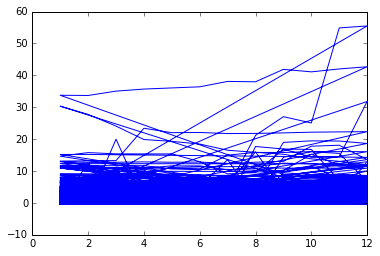

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(balances[['month']],balances[['normal_tot_bal']])
plt.show()

In [30]:
X = balances[balances['month'] == 12][['normal_tot_bal']]
X

normal_tot_bal
69705        -0.332348
115843       -0.007582
97687         0.135956
97568        -0.369049
30365        -0.175294
91161        -0.033061
63577        -0.366416
114265       -0.346415
9472         -0.215153
113136       -0.294252
41233        -0.229761
102205       -0.370827
10321        -0.306356
59732         0.954343
16107         2.605403
44981         1.339886
33019        -0.351449
68459        -0.335990
11437        -0.332697
97623        -0.267471
99806        -0.394386
104423       -0.311241
91951        -0.402817
59544        -0.294719
104931        0.740422
17350        -0.203075
115285        5.021744
30574        -0.330103
53202        -0.287784
13704        -0.353933
...                ...
3509          0.443277
91543        -0.308123
110121        0.199190
68006         1.571975
76197        -0.305127
47193        -0.248423
95998         0.088785
76692        -0.144632
119431       -0.117224
75296        -0.372950
56773         0.228145
22331        -0.365744
58566         0.456333
11686         0.830023
103253       -0.383898
13309        -0.398923
53921        -0.332492
40886        -0.331508
72861        -0.393978
9906         -0.397459
77643        -0.332068
3591         -0.212020
84289        -0.287871
114286       -0.335422
43059        -0.360114
116019        2.391484
38340        -0.405264
76172         0.369130
22689        -0.379289
92974        -0.163728

[10000 rows x 1 columns]

## k-means cluster to find similar user groups

In [33]:
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
n = 3
## initialize with K-means++, a good way of speeding up convergence
k_means = KMeans(init='k-means++', n_clusters=n, n_init=5)
## record the current time
# t_km = time.time()
# start clustering!
k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = k_means.labels_
## get the time to finish clustering
# t_fin_km = time.time() - t_km

In [35]:
print('Cluster centers',k_means_cluster_centers)
print(np.unique(k_means_labels))

Cluster centers [[ -0.12748082]
 [ 38.09127806]
 [  3.21200668]]
[0 1 2]


normal_tot_bal    9597
dtype: int64

#### Dataset split: 60 train, 20 dev, 20 test

In [23]:
# train = dataframe.sample(frac=0.6)
# dev = dataframe.drop(train.index).sample(frac=0.5)
# test = dataframe.drop(train.index).drop(dev.index)

*Since each customer's 12 month records would count as one record in this case, we need to split dataset by unique cust_num. This ensures each customer's data stays in one dataset, and doesn't spill to different datasets.*

#### Derive balance delta between month 0 and month 12

In [ ]:
dataframe[['balance_delta']] = dataframe[['normal_tot_bal']] 

In [46]:
growth_trainsplit = dataframe.cust_num.sample(frac=0.6)
growth_train = dataframe[dataframe['cust_num'].isin(growth_trainsplit)]
growth_devsplit = dataframe.cust_num.drop(growth_trainsplit.index).sample(frac=0.5)
growth_dev = dataframe[dataframe['cust_num'].isin(growth_devsplit)]
growth_testsplit = dataframe.cust_num.drop(growth_trainsplit.index).drop(growth_devsplit.index)
growth_test = dataframe[dataframe['cust_num'].isin(growth_testsplit)]

In [47]:
growth_dev[['cust_num','month','normal_tot_bal']]

cust_num  month  normal_tot_bal
73075          1      1       -0.373969
74423          1      2       -0.384322
73749          1      3       -0.391042
75097          1      4       -0.394362
75771          1      5       -0.397683
72401          1      6       -0.398677
76445          1      7       -0.399670
69031          1      8       -0.400664
70379          1      9       -0.383604
71053          1     10       -0.283542
71727          1     11       -0.292912
69705          1     12       -0.332348
113918         2      1        0.020825
114093         2      2        0.010767
114268         2      3        0.007832
114443         2      4        0.013448
114618         2      5        0.016718
114793         2      6        0.011928
114968         2      7        0.019952
115318         2      8        0.021070
115493         2      9        0.022654
115668         2     10       -0.000660
115143         2     11       -0.008601
115843         2     12       -0.007582
91749          4      1       -0.398623
92278          4      2       -0.397067
93336          4      3       -0.395510
93865          4      4       -0.381502
92807          4      5       -0.379946
94394          4      6       -0.378389
...          ...    ...             ...
42648       9997      7       -0.405265
36904       9997      8       -0.405265
41930       9997      9       -0.405265
37622       9997     10       -0.405265
39776       9997     11       -0.405264
38340       9997     12       -0.405264
24849       9999      1       -0.370670
19089       9999      2       -0.369675
18369       9999      3       -0.377640
20529       9999      4       -0.371892
23409       9999      5       -0.376583
24129       9999      6       -0.383291
25569       9999      7       -0.381640
19809       9999      8       -0.385191
17649       9999      9       -0.368183
21249       9999     10       -0.366251
21969       9999     11       -0.367478
22689       9999     12       -0.379289
94032      10000      1       -0.266853
95090      10000      2       -0.254645
95619      10000      3       -0.276077
92445      10000      4       -0.248530
93503      10000      5       -0.253202
94561      10000      6       -0.257270
96677      10000      7       -0.243511
97206      10000      8       -0.244106
97735      10000      9       -0.235356
96148      10000     10       -0.227735
91916      10000     11       -0.155051
92974      10000     12       -0.163728

[111828 rows x 3 columns]